In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

Different to before, we have now a non-linear dependency between x & y...

In [42]:
N = 10

X = np.sort(2 * np.random.rand(N, 1), axis=0)
y = 4 + 3 * X + 5*X**2 + np.random.randn(N, 1)

In [43]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.83064638] [[8.59737263 2.21898425]]


Predicting as before and we see that the fit is quite good

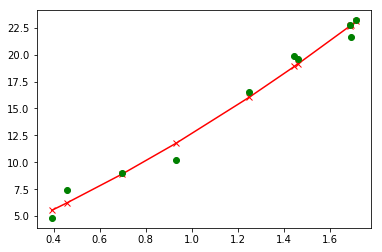

In [44]:
ypred = lin_reg.intercept_ + lin_reg.coef_[0][0]*X + lin_reg.coef_[0][1]*X**2
plt.plot(X, ypred, '-rx', X, y,'go')

Now let's increase the polynom degree to 10 and fit the data

In [45]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[-104156.87036414] [[  995422.32609174 -3828679.11800111  7385952.42543564 -6582493.43347701
   -547572.02229408  7448184.40756367 -7856577.39814058  4049239.88478067
  -1077994.8579632    118644.70024881]]


... and we run into a classical overfitting - look at the coefficient values! However, since polydegree = number of data points, we get a perfect match

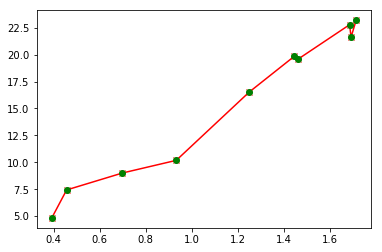

In [47]:
# ypred = lin_reg.intercept_ + np.sum([lin_reg.coef_[0][i]*X**(i+1) for i in range(10)], axis=0)
# simpler
ypred = lin_reg.predict(X_poly)
plt.plot(X, ypred, '-rx', X, y,'go')

Using Ridge regression; loss function = $MSE(\theta) + \frac{\alpha}{2} \sum_i \theta_i^2$. The $\alpha$ value causes the coefficients not to become "too big".


In [59]:
ridge_reg = Ridge(alpha=1, solver='cholesky',fit_intercept=False)
ridge_reg.fit(X_poly,y)
ridge_reg.coef_

array([[ 5.21971123,  2.97804293,  1.7850605 ,  1.07369203,  0.58035823,
         0.18335517, -0.15664447, -0.40036251, -0.38689347,  0.27241142]])

Prediction - It's no

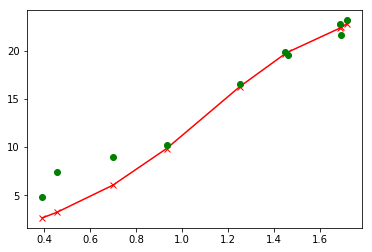

In [60]:
ypred_ridge = ridge_reg.predict(X_poly)
plt.plot(X, ypred_ridge, '-rx', X, y,'go')